## SAT terms on material boundary interfaces

In [1]:
from sympy import *
from sympy import oo

v1/2  : velocity at + and - side.

p1/2  : pressure at + and - side.

Z1/2  : impedance at + and - side.

sat1/2: SAT coefficients at + and - side.

In [10]:
A, v1, v2, p1, p2, Z1, Z2, sat1, sat2, p_c = symbols('A v1 v2 p1 p2 Z1 Z2 sat1 sat2 pc')

In [11]:
init_printing(use_unicode=True)

In [12]:
vhat = (p2 - p1 + Z1*v1 + Z2*v2)/(Z1 + Z2)
phat = (Z1*p2 + Z2*p1 + Z1*Z2*(v2 - v1))/(Z1 + Z2)

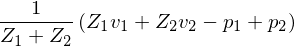

In [13]:
vhat

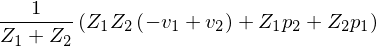

In [14]:
phat

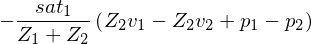

In [15]:
simplify(-sat1*(v1 - vhat))

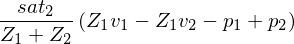

In [16]:
simplify(-sat2*(v2 - vhat))

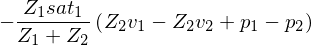

In [17]:
simplify(-sat1*(p1 - phat))

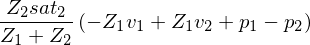

In [18]:
simplify(-sat2*(p2 - phat))

### For a crack interface

In [19]:
vhat1 = (Z1*v1-p1 + p_c)/Z1
vhat2 = (Z2*v2+p2 - p_c)/Z2
print(vhat1)
print(vhat2)

(Z1*v1 - p1 + pc)/Z1
(Z2*v2 + p2 - pc)/Z2


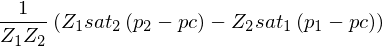

In [20]:
simplify(-sat1*(v1 - vhat1)-sat2*(v2-vhat2))

In [22]:
simplify(-sat1*(p1-p_c)-sat2*(p2-p_c))

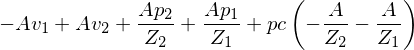

In [23]:
Q = A*(vhat2 - vhat1)
simplify(Q).expand().collect(p_c)

### For a crack bottom

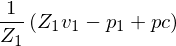

In [13]:
vhat1 = (Z1*v1-p1 + p_c)/Z1
vhat1

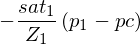

In [14]:
simplify(-sat1*(v1 - vhat1))

In [15]:
simplify(-sat1*(p1 - pc))